In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps, cm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

In [35]:
df = pd.read_csv("C:\Data science\Data set\Live.csv")
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [36]:
df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)


df.replace('?', np.nan, inplace=True)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


In [37]:
df = df.drop(['status_id', 'status_published'], axis=1)


print('status_type= ',df['status_type'].unique())
len(df['status_type'].unique())

status_type=  ['video' 'photo' 'link' 'status']


4

In [38]:
label_encoder = LabelEncoder()


df['status_type'] = label_encoder.fit_transform(df['status_type'])

df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


In [39]:
categorical_feature = df['status_type'].values.reshape(-1,1)


col = df.columns


numerical_df= df.drop(['status_type'], axis=1)



scale = StandardScaler()
minmax_scaler = MinMaxScaler()

scaled_arr = scale.fit_transform(numerical_df)
minmax_arr = minmax_scaler.fit_transform(numerical_df)


scaled_df = pd.DataFrame(np.concatenate((scaled_arr, categorical_feature), axis=1), columns=list(numerical_df) + ['status_type'])


minmax_scaled_df = pd.DataFrame(np.concatenate((minmax_arr, categorical_feature), axis=1), columns=list(numerical_df) + ['status_type'])

scaled_df.tail()
minmax_scaled_df.tail()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type
7045,0.018896,0.000000,0.000000,0.018896,0.000000,0.0,0.000000,0.0,0.0,1.0
7046,0.003397,0.000000,0.000000,0.002972,0.001522,0.0,0.006369,0.0,0.0,1.0
7047,0.000425,0.000000,0.000000,0.000212,0.001522,0.0,0.000000,0.0,0.0,1.0
7048,0.074522,0.000572,0.006425,0.074098,0.003044,0.0,0.000000,0.0,0.0,1.0
7049,0.003609,0.000000,0.000000,0.003609,0.000000,0.0,0.000000,0.0,0.0,1.0


In [40]:
n_clusters = 2
Kmeans = KMeans(init = 'k-means++',n_clusters=n_clusters, n_init = 12, max_iter=300, algorithm='lloyd', random_state=43)

# Fit the model on dataset
Kmeans.fit(minmax_scaled_df)

# label of each point
labels = Kmeans.predict(minmax_scaled_df)
labels 

# centroids coordinate
centroids = Kmeans.cluster_centers_
#print(f'Centroids coordinate= \n{centroids}')

minmax_scaled_df['cluster_km'] = labels

# Convert dataframe to array
X = minmax_scaled_df.values


Kmeans.inertia_

573.5145276095835

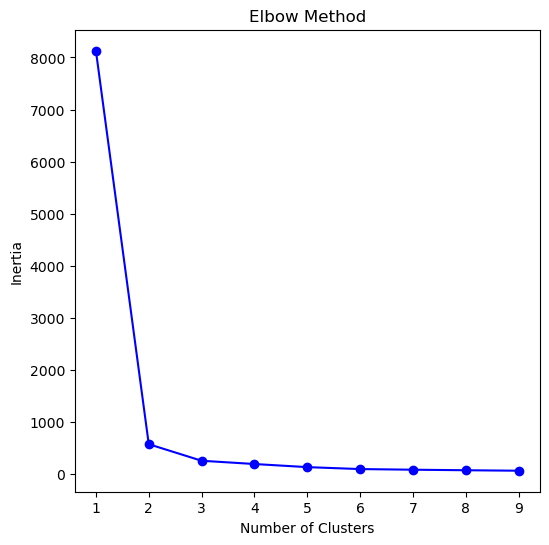

In [41]:
inertia_list=[]

K = range(1,10)

for k in K:
    Kmeans_clustering = KMeans(n_clusters = k, init= 'k-means++', n_init = 12, max_iter = 300, algorithm = 'lloyd', random_state = 42)
    Kmeans_clustering.fit(minmax_scaled_df)
    Kmeans_inertia = Kmeans_clustering.inertia_
    inertia_list.append(Kmeans_inertia)

plt.figure(figsize=((6,6)))
plt.plot(K, inertia_list, 'bo-')    

plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.show()

In [42]:
silhoutte_avg = silhouette_samples(minmax_scaled_df, labels)
print(f'Silhoutte average= {silhoutte_avg}')

well_clustered_datapoints = (silhoutte_avg >0.5).sum()
print(well_clustered_datapoints)

average_score = np.mean(silhoutte_avg)
print(f'average score = {average_score}')

Silhoutte average= [0.86120194 0.96218841 0.88968774 ... 0.96623039 0.94313913 0.96779014]
6678
average score = 0.889743743168126
